# CLASE 2: Árboles de decisión

**Algunos hotkeys útiles en jupyter:**

* **control+enter**: correr celda.
* **enter**: editar celda.
* **escape**: salir del modo edición.
* **control+s**: guardar notebook.

**Fuera del modo edición se pueden utilizar los siguientes hotkeys:**
* **a**: agregar celda arriba.
* **b**: agregar celda abajo.
* **x**: borrar celda.
* **z**: deshacer borrar celda.
* **y**: setear celda en modo python (código).
* **m**: setear celda en modo markdown (texto).
* **o**: mostrar/ocultar resultado.

**Líbrerias:**

* **Jupyter notebook**: Entorno de trabajo [(cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Jupyter_Notebook_Cheat_Sheet.pdf)
* **Numpy**: librería de funciones matemáticas de alto nivel para operar con vectores y matrices [(cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* **Pandas**: librería destinada al análisis de datos, permiten trabajar con datos estructurados de forma muy eficiente [(cheat sheet)](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* **Matplotlib**: librería para la generación de gráficos [(cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
* **Seaborn**: librería para la generación de gráficos de alto nivel, por debajo usa Matplotlib [(ejemplos)](https://seaborn.pydata.org/examples/index.html)

Los cheatsheets son un resumen de las principales funciones de las librerías, pueden encontrar los enlaces a la documentación oficial en la pestaña "Help" en este notebook.

In [9]:
import utils, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

\* La linea **%matplotlib inline**, nos permite visualizar los graficos generados dentro de este notebook.

# Arboles de decision

## Leer / formatear data

In [10]:
# Usamos pandas para cargar el archivo csv:
df = pd.read_csv('data/animals.csv')
df

,Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
0,human,warm-blooded,hair,yes,no,no,yes,no,mammal
1,python,cold-blooded,scales,no,no,no,no,yes,reptile
2,salmon,cold-blooded,scales,no,yes,no,no,no,fish
3,whale,warm-blooded,hair,yes,yes,no,no,no,mammal
4,frog,cold-blooded,none,no,semi,no,yes,yes,amphibian
5,Komodo dragon,cold-blooded,scales,no,no,no,yes,no,reptile
6,bat,warm-blooded,hair,yes,no,yes,yes,yes,mammal
7,pigeon,warm-blooded,feathers,no,no,yes,yes,no,bird
8,cat,warm-blooded,fur,yes,no,no,yes,no,mammal
9,leopard shark,cold-blooded,scales,yes,yes,no,no,no,fish


In [11]:
# Tamaño del dataframe
df.shape

(15, 9)

In [12]:
# Separamos las variables independientes (x).
x = df.drop(['Name', 'Class Label'], axis=1)

# Mostramos la matriz transpuesta (x.T), porque nos permite visualizar usando menos espacio en este caso.
x.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Body Temperature,warm-blooded,cold-blooded,cold-blooded,warm-blooded,cold-blooded,cold-blooded,warm-blooded,warm-blooded,warm-blooded,cold-blooded,cold-blooded,warm-blooded,warm-blooded,cold-blooded,cold-blooded
Skin Cover,hair,scales,scales,hair,none,scales,hair,feathers,fur,scales,scales,feathers,quills,scales,none
Gives Birth,yes,no,no,yes,no,no,yes,no,yes,yes,no,no,yes,no,no
Aquatic Creature,no,no,yes,yes,semi,no,no,no,no,yes,semi,semi,no,yes,semi
Aerial Creature,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no
Has Legs,yes,no,no,no,yes,yes,yes,yes,yes,no,yes,yes,yes,no,yes
Hibernates,no,yes,no,no,yes,no,yes,no,no,no,no,no,yes,no,yes


In [13]:
# Separamos las variables dependientes (y).
y = df['Class Label']
y

0        mammal
1       reptile
2          fish
3        mammal
4     amphibian
5       reptile
6        mammal
7          bird
8        mammal
9          fish
10      reptile
11         bird
12       mammal
13         fish
14    amphibian
Name: Class Label, dtype: object

Dado que necesitamos que la data este en formato númerico, aplicamos el metodo de pandas **pd.get_dummies**, para convertir las variables categóricas en columnas con indicadores binarios:

![](images/dummies.png)

In [14]:
x = pd.get_dummies(x)
x.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Body Temperature_cold-blooded,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1
Body Temperature_warm-blooded,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0
Skin Cover_feathers,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
Skin Cover_fur,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Skin Cover_hair,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
Skin Cover_none,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
Skin Cover_quills,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Skin Cover_scales,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
Gives Birth_no,0,1,1,0,1,1,0,1,0,0,1,1,0,1,1
Gives Birth_yes,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0


## Usar scikit-learn para entrenar un árbol de decisión

La librería [scikit-learn](http://scikit-learn.org) ofrece un conjunto de utilidades y funcinoes para aplicar los algoritmos más conocidos de  machine learning. En su [documentación](http://scikit-learn.org/stable/documentation.html) se encuentran tutoriales y guías de usuario bien detalladas.

Vamos a crear un modelo de árbol de decisión usando la clase **DecisionTreeClassifier**.

Luego usando el método **fit** del modelo, vamos a entrenar el árbol.

In [15]:
from sklearn.tree import DecisionTreeClassifier

m = DecisionTreeClassifier()
m.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
# accuracy
m.score(x, y)

1.0

## Visualicemos el árbol

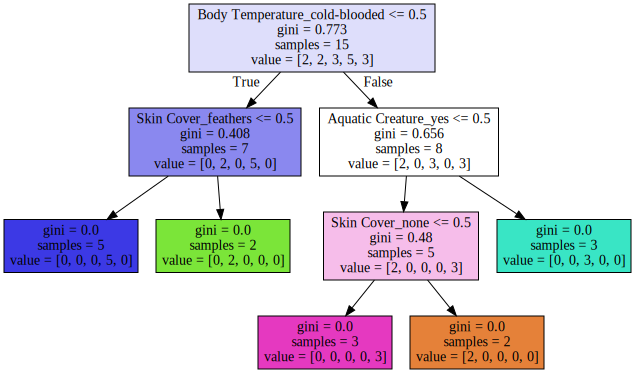

In [17]:
utils.draw_tree(m, x)

In [18]:
m.classes_

array(['amphibian', 'bird', 'fish', 'mammal', 'reptile'], dtype=object)

## Calculemos el gini inicial

In [19]:
y

0        mammal
1       reptile
2          fish
3        mammal
4     amphibian
5       reptile
6        mammal
7          bird
8        mammal
9          fish
10      reptile
11         bird
12       mammal
13         fish
14    amphibian
Name: Class Label, dtype: object

In [20]:
y.value_counts()

mammal       5
reptile      3
fish         3
bird         2
amphibian    2
Name: Class Label, dtype: int64

In [21]:
# "len" devuelve el tamaño de un array, en este caso el número de elementos en "y"
len(y)

15

$p_i$:

In [23]:
y.value_counts() / len(y)

mammal       0.333333
reptile      0.200000
fish         0.200000
bird         0.133333
amphibian    0.133333
Name: Class Label, dtype: float64

$p_i^2$:

In [24]:
(y.value_counts() / len(y))**2

mammal       0.111111
reptile      0.040000
fish         0.040000
bird         0.017778
amphibian    0.017778
Name: Class Label, dtype: float64

$\sum\limits_i p_i^2$:

In [25]:
((y.value_counts() / len(y))**2).sum()

0.22666666666666668

$I_G (p) = 1 - \sum\limits_i p_i^2$:

In [26]:
1 - ((y.value_counts() / len(y))**2).sum()

0.7733333333333333

## Ejercicio 1

La primera regla del árbol es **"Body Temperature_warm-blooded <= 0.5"**, esta separa la data en 2 conjuntos (los que cumplen la regla y los que no). Calcular el gini para cada conjuntos.

In [27]:
mask = x['Body Temperature_warm-blooded'] <= 0.5
mask

0     False
1      True
2      True
3     False
4      True
5      True
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13     True
14     True
Name: Body Temperature_warm-blooded, dtype: bool

In [28]:
data_true = y[mask]
data_true

1       reptile
2          fish
4     amphibian
5       reptile
9          fish
10      reptile
13         fish
14    amphibian
Name: Class Label, dtype: object

In [29]:
data_false = y[~mask]
data_false

0     mammal
3     mammal
6     mammal
7       bird
8     mammal
11      bird
12    mammal
Name: Class Label, dtype: object

In [21]:
# Calcular gini para data_true (debe salir ~0.656)


In [22]:
# Calcular gini para data_false (debe salir ~0.408)


# Análisis exploratorio

Titanic dataset: https://www.kaggle.com/c/titanic

**Goal:**

It is your job to predict if a passenger survived the sinking of the Titanic or not.

For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

Data description:

<table><tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody></table>

In [30]:
df = pd.read_csv('data/titanic_train.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [31]:
# Tamaño del dataset:  (filas, columnas)
# En la nomenclatura de pandas: (axis 0, axis 1)
df.shape

(891, 12)

In [32]:
# Veamos los tipos de variables
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [33]:
# La cantidad de registros únicos por variable
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [34]:
# % de registros únicos por variable
df.nunique() / len(df)

PassengerId    1.000000
Survived       0.002245
Pclass         0.003367
Name           1.000000
Sex            0.002245
Age            0.098765
SibSp          0.007856
Parch          0.007856
Ticket         0.764310
Fare           0.278339
Cabin          0.164983
Embarked       0.003367
dtype: float64

In [35]:
# % de datos faltantes
df.isna().sum() / len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [36]:
# Antes de continuar podemos eliminar algunas variables del dataset que filtran informacion acerca de nuestro objetivo.
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# axis=1: aplicamos la función a las columnas
# inplace=True: aplica la función al dataframe
# inplace=False (default): devuelve el dataframe modificado

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Variables categóricas y variables numéricas

In [37]:
# Veamos las columnas, este tipo de sintaxis se llama "list comprehensions"
[c for c in df]

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

[list comprehensions documentation](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)

In [38]:
# Una variable númerica puede tener distintos tipos (int, float, double, ...).
# Para ver si una variables es numérica podemos usar la función pd.api.types.is_numeric_dtype:
pd.api.types.is_numeric_dtype(df['Age'])

True

In [39]:
# Variables numéricas
num_vars = [c for c in df if pd.api.types.is_numeric_dtype(df[c])]
num_vars

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [40]:
# Variables categóricas
cat_vars = [c for c in df if not pd.api.types.is_numeric_dtype(df[c])]
cat_vars

['Sex', 'Cabin', 'Embarked']

### Transformar las variables  a categoricas

In [41]:
# Si usamos get_dummies, se generan muchas columnas
pd.get_dummies(df).shape

(891, 158)

In [42]:
df[cat_vars].nunique()

Sex           2
Cabin       147
Embarked      3
dtype: int64

La variable "Cabin" tiene muchos valores únicos.

Vamos a aplicar otro método para transformar los valores a numéricos: **label encoding**.

In [43]:
# Usando el metodo "astype" Podemos cambiar el tipo de variable a "category":
t = df['Sex'].astype('category')
t.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: category
Categories (2, object): [female, male]

In [44]:
# Dentro de dataframe.cat se encuentran los métodos para variables categóricas:

# cat.codes: Representación númerica de la data
t.cat.codes.head()

0    1
1    0
2    0
3    0
4    1
dtype: int8

In [45]:
# cat.categories: Categorías encontradas
t.cat.categories

Index(['female', 'male'], dtype='object')

In [46]:
# Si queremos entender los códigos luego, necesitamos un diccionario para guardarlos.
# Usamos la sintaxis de listcomprehensions con {} en vez de [], para armar un diccionario:
{i:e for i,e in enumerate(t.cat.categories)}

{0: 'female', 1: 'male'}

In [47]:
# Cuando una columna se convierte a tipo category, los datos faltantes se completan con -1.
# Es una buena práctica sumar +1 al índice de manera que los datos faltantes usen el indice 0.
t_dict = {i+1:e for i,e in enumerate(t.cat.categories)}
t_dict

{1: 'female', 2: 'male'}

In [48]:
# Usando el diccionario
t_dict[2]

'male'

In [49]:
# Ahora vamos a aplicar esta transformación a todas las variables categóricas,
# guardando un diccionario de códigos.

# 1. Creamos un diccionario vacio
cat_dict = {}

for cat in cat_vars:
    # 2. Transformamos la variable a tipo category
    df[cat] = df[cat].astype('category')
    
    # 3. Agregamos el diccionario de códigos
    cat_dict[cat] = {i+1:e for i,e in enumerate(df[cat].cat.categories)}

cat_dict

{'Sex': {1: 'female', 2: 'male'},
 'Cabin': {1: 'A10',
  2: 'A14',
  3: 'A16',
  4: 'A19',
  5: 'A20',
  6: 'A23',
  7: 'A24',
  8: 'A26',
  9: 'A31',
  10: 'A32',
  11: 'A34',
  12: 'A36',
  13: 'A5',
  14: 'A6',
  15: 'A7',
  16: 'B101',
  17: 'B102',
  18: 'B18',
  19: 'B19',
  20: 'B20',
  21: 'B22',
  22: 'B28',
  23: 'B3',
  24: 'B30',
  25: 'B35',
  26: 'B37',
  27: 'B38',
  28: 'B39',
  29: 'B4',
  30: 'B41',
  31: 'B42',
  32: 'B49',
  33: 'B5',
  34: 'B50',
  35: 'B51 B53 B55',
  36: 'B57 B59 B63 B66',
  37: 'B58 B60',
  38: 'B69',
  39: 'B71',
  40: 'B73',
  41: 'B77',
  42: 'B78',
  43: 'B79',
  44: 'B80',
  45: 'B82 B84',
  46: 'B86',
  47: 'B94',
  48: 'B96 B98',
  49: 'C101',
  50: 'C103',
  51: 'C104',
  52: 'C106',
  53: 'C110',
  54: 'C111',
  55: 'C118',
  56: 'C123',
  57: 'C124',
  58: 'C125',
  59: 'C126',
  60: 'C128',
  61: 'C148',
  62: 'C2',
  63: 'C22 C26',
  64: 'C23 C25 C27',
  65: 'C30',
  66: 'C32',
  67: 'C45',
  68: 'C46',
  69: 'C47',
  70: 'C49',
  71

In [50]:
# Usando el diccionario
cat_dict['Cabin'][20]

'B20'

In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Data faltante

In [52]:
df[num_vars].isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

Al transformar la data categórica, se asignó un código para los datos faltantes.

En el caso de data numérica debemos hacer un tratamiento especial a la data faltante.

El procedimiento que realizaremos es el siguiente:
1. Obtenemos un diccionario con las medianas de cada variable.
2. Creamos una columna que indique si hay data faltante.
3. Reemplazamos los datos faltantes con la mediana obtenida.

In [53]:
# 1. Obtenemos la mediana de la columna y la almacenamos en un diccionario.
na_dict = df[num_vars].median().to_dict()
na_dict

{'Survived': 0.0,
 'Pclass': 3.0,
 'Age': 28.0,
 'SibSp': 0.0,
 'Parch': 0.0,
 'Fare': 14.4542}

In [54]:
# 2. Creamos una columna que indique si hay data faltante.
df['Age_na'] = df['Age'].isna()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_na
0,0,3,male,22.0,1,0,7.2500,NaN,S,False
1,1,1,female,38.0,1,0,71.2833,C85,C,False
2,1,3,female,26.0,0,0,7.9250,NaN,S,False
3,1,1,female,35.0,1,0,53.1000,C123,S,False
4,0,3,male,35.0,0,0,8.0500,NaN,S,False


In [55]:
# 3. Reemplazamos los datos faltantes con la mediana obtenida.
df.Age.fillna(na_dict['Age'], inplace=True)
df[num_vars].isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Guardamos la data preprocesada

In [56]:
# El formato pickle nos permite guardar objetos de python
with open('data/titanic_cat_dict.pkl', 'wb') as f:
    pickle.dump(cat_dict, f)
    
with open('data/titanic_na_dict.pkl', 'wb') as f:
    pickle.dump(na_dict, f)

df.to_pickle('data/titanic_train.pkl')

In [57]:
# Cargar data
with open('data/titanic_cat_dict.pkl', 'rb') as f:
    cat_dict = pickle.load(f)

with open('data/titanic_na_dict.pkl', 'rb') as f:
    na_dict = pickle.load(f)

df_raw = pd.read_pickle('data/titanic_train.pkl')

df_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_na
0,0,3,male,22.0,1,0,7.2500,NaN,S,False
1,1,1,female,38.0,1,0,71.2833,C85,C,False
2,1,3,female,26.0,0,0,7.9250,NaN,S,False
3,1,1,female,35.0,1,0,53.1000,C123,S,False
4,0,3,male,35.0,0,0,8.0500,NaN,S,False


### Convertimos las columnas a numéricas

In [58]:
# Hacemos una copia de la data
df = df_raw.copy()

# Convertimos cada columna categórica a numérica
for n,col in df.items():
    # n: nombre de la columna
    # col: data de la columna
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1
        
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_na
0,0,3,2,22.0,1,0,7.2500,0,3,False
1,1,1,1,38.0,1,0,71.2833,82,1,False
2,1,3,1,26.0,0,0,7.9250,0,3,False
3,1,1,1,35.0,1,0,53.1000,56,3,False
4,0,3,2,35.0,0,0,8.0500,0,3,False


## Visualizando data

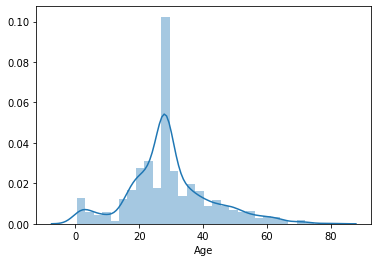

In [59]:
sns.distplot(df['Age']);

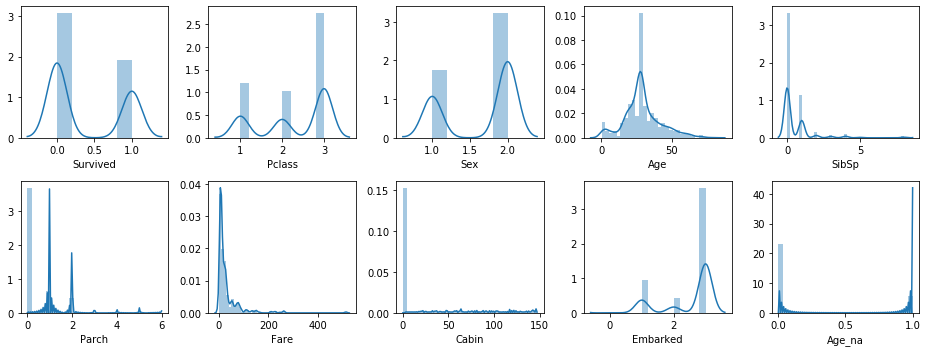

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(13,5))
df['Age_na'] = df['Age_na'].astype(np.float32)
for c,ax in zip(df, axes.flatten()):
    sns.distplot(df[c], ax=ax)
    
plt.tight_layout()

# Entrenar modelo

In [61]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [62]:
# Entrenamos un arbol con poca profundidad, para visualizarlo comodamente:
m = DecisionTreeClassifier(max_depth=3)
m.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
m.score(x, y)

0.8237934904601572

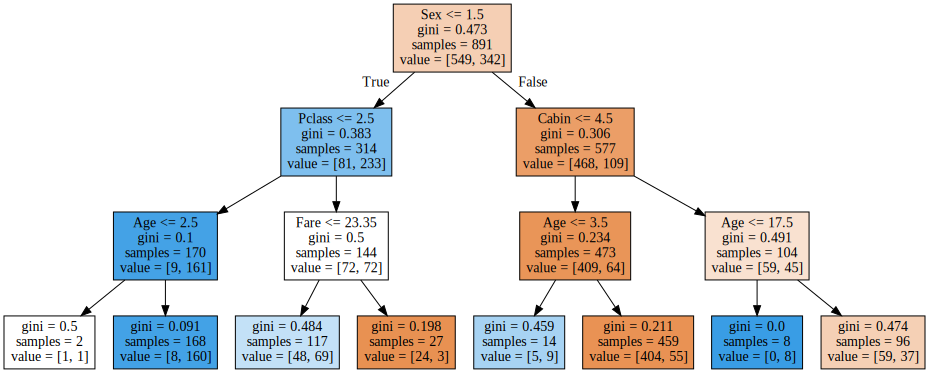

In [64]:
utils.draw_tree(m, x)

## Usar el modelo en otro conjunto de data

### Cargar/preprocesar la data

In [65]:
df_test = pd.read_csv('data/titanic_test.csv')
df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [66]:
# Necesitamos crear columnas para la data faltante que usamos al entrenar
[c[:-3] for c in df if c.endswith('_na')]

['Age']

In [67]:
for col in [c[:-3] for c in df if c.endswith('_na')]:
    df_test[col+'_na'] = df_test[col].isna()
    
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_na
0,3,male,34.5,0,0,7.8292,NaN,Q,False
1,3,female,47.0,1,0,7.0000,NaN,S,False
2,2,male,62.0,0,0,9.6875,NaN,Q,False
3,3,male,27.0,0,0,8.6625,NaN,S,False
4,3,female,22.0,1,1,12.2875,NaN,S,False


In [68]:
df_test.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
Age_na        0
dtype: int64

In [69]:
# Usamos el diccionario "na_dict" para completar la data faltante
for n,v in na_dict.items():
    if n in df_test:
        df_test[n].fillna(v, inplace=True)
    
df_test.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       327
Embarked      0
Age_na        0
dtype: int64

In [70]:
# Usamos el data frame de entrenamiento para aplicar las mismas categorias a este
for n,col in df_raw.items():
    if pd.api.types.is_categorical_dtype(col):
        df_test[n] = pd.Categorical(df_test[n], categories=col.cat.categories).codes + 1

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_na
0,3,2,34.5,0,0,7.8292,0,2,False
1,3,1,47.0,1,0,7.0000,0,3,False
2,2,2,62.0,0,0,9.6875,0,2,False
3,3,2,27.0,0,0,8.6625,0,3,False
4,3,1,22.0,1,1,12.2875,0,3,False


### Obtener las predicciones del modelo

In [71]:
m.predict(df_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# ¿Cómo saber si el modelo esta haciendo un buen trabajo?

Vamos a separar la data en 2 conjuntos: uno para entrenar el modelo (**train set**) y otro para validar el modelo (**validation set**).

In [72]:
from sklearn.model_selection import train_test_split

# Usamos método "train_test_split" para usar el 20% de la data para validar el modelo.
# El parámetro "random state" nos sirve para poder replicar la misma separación.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape: {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape: (712, 9)
Validation shape: (179, 9)


# Ejercicio 2

* Entrenar un árbol de decisión con la data de entrenamiento.
* Evaluar el resultado con la data de entrenamiento.
* Evaluar el resultado con la data de validación.
* Ver la documentacion del metodo DecisionTreeClassifier, experimanto con distintos parámetros y observa los resultados.
  - ¿Qué parámetros te ayudan a incrementar la precisión?
  - ¿Cómo cambia la precisión en el conjunto de prueba?